<a href="https://colab.research.google.com/github/MarianoNCrz/Proyects/blob/main/Proyecto_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
# Configuración inicial
np.random.seed(42)
n_users = 5000
n_records = 50000

# Generar datos simulados
data = {
    "user_id": np.random.randint(1, n_users, n_records),
    "content_id": np.random.randint(1, 500, n_records),
    "content_type": np.random.choice(["movie", "series"], n_records),
    "genre": np.random.choice(["Action", "Comedy", "Drama", "Documentary", "Horror"], n_records),
    "duration_total": np.random.randint(30, 180, n_records),
    "duration_viewed": np.random.randint(5, 180, n_records),
    "rating": np.random.choice([1, 2, 3, 4, 5, np.nan], n_records),
    "view_date": [datetime.now() - timedelta(days=np.random.randint(1, 90)) for _ in range(n_records)],
    "device": np.random.choice(["Web", "Mobile", "TV"], n_records),
    "location": np.random.choice(["USA", "Canada", "Brazil", "UK", "India"], n_records)
}

df_raw = pd.DataFrame(data)

print("Muestra de datos simulados:")
print(df_raw.head())


Muestra de datos simulados:
   user_id  content_id content_type        genre  duration_total  \
0      861         119        movie        Drama             138   
1     3773         330       series  Documentary             168   
2     3093         215        movie       Comedy             152   
3      467         322       series       Action              47   
4     4427         149       series       Action              99   

   duration_viewed  rating                  view_date  device location  
0               78     5.0 2024-11-06 22:14:02.176883  Mobile      USA  
1              161     1.0 2024-11-02 22:14:02.176916     Web   Brazil  
2              115     4.0 2024-11-26 22:14:02.176922      TV      USA  
3               64     5.0 2024-09-20 22:14:02.176927  Mobile      USA  
4              141     4.0 2024-11-13 22:14:02.176932  Mobile   Brazil  


#Extracción Full e Incremental

In [3]:
# Registro de última fecha procesada
last_processed_date = None

def extract_data(full=True):
    global last_processed_date
    if full or not last_processed_date:
        print("Extracción FULL...")
        df = df_raw  # Todos los datos
    else:
        print("Extracción INCREMENTAL...")
        df = df_raw[df_raw['view_date'] > last_processed_date]  # Datos nuevos

    last_processed_date = df['view_date'].max()
    print(f"Última fecha procesada: {last_processed_date}")
    return df

#Transformaciones Avanzadas

In [4]:
def transform_data(df):
    # Calcular porcentaje de visualización
    df["view_percentage"] = (df["duration_viewed"] / df["duration_total"]) * 100

    # Categorizar usuarios según su actividad
    df["user_activity"] = pd.cut(df["view_percentage"],
                                 bins=[0, 20, 80, 100],
                                 labels=["Inactivo", "Ocasional", "Activo"])

    # Agregar columna de hora pico
    df["view_hour"] = df["view_date"].dt.hour

    print("Transformaciones completadas:")
    print(df.head())
    return df


#Guardado de Datos en Delta Lake

In [5]:
!pip install deltalake matplotlib pandas requests

In [6]:
from deltalake import write_deltalake

# Guardar datos transformados
write_deltalake("/content/processed_netflix", transform_data(extract_data(full=True)), mode="overwrite")


Extracción FULL...
Última fecha procesada: 2024-12-16 22:14:02.527808
Transformaciones completadas:
   user_id  content_id content_type        genre  duration_total  \
0      861         119        movie        Drama             138   
1     3773         330       series  Documentary             168   
2     3093         215        movie       Comedy             152   
3      467         322       series       Action              47   
4     4427         149       series       Action              99   

   duration_viewed  rating                  view_date  device location  \
0               78     5.0 2024-11-06 22:14:02.176883  Mobile      USA   
1              161     1.0 2024-11-02 22:14:02.176916     Web   Brazil   
2              115     4.0 2024-11-26 22:14:02.176922      TV      USA   
3               64     5.0 2024-09-20 22:14:02.176927  Mobile      USA   
4              141     4.0 2024-11-13 22:14:02.176932  Mobile   Brazil   

   view_percentage user_activity  view_hour  


#Visualización Avanzada

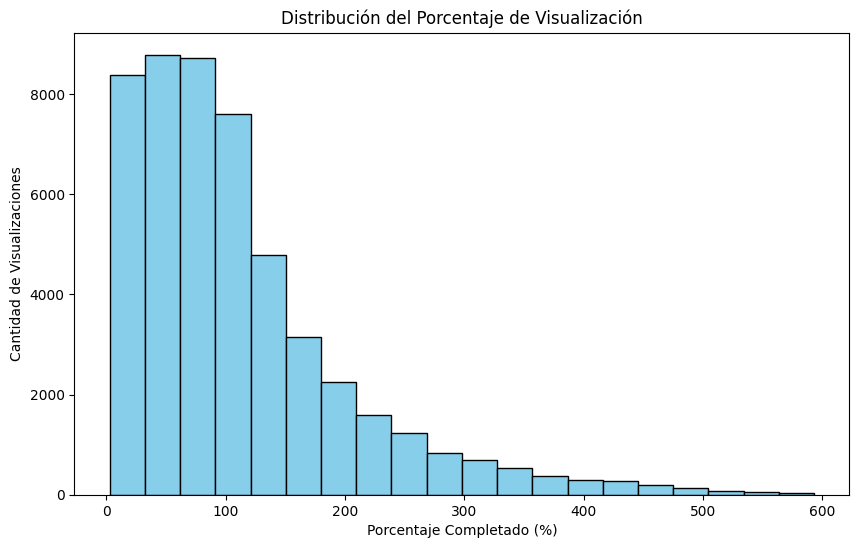

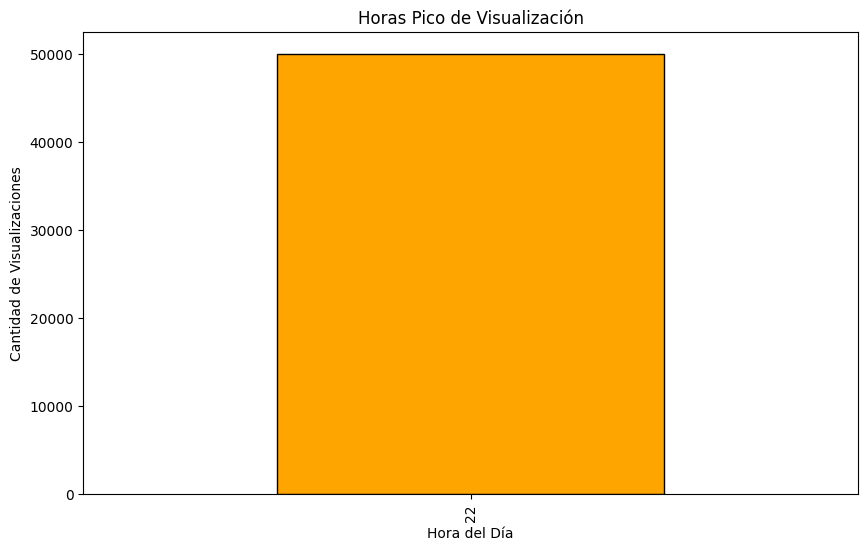

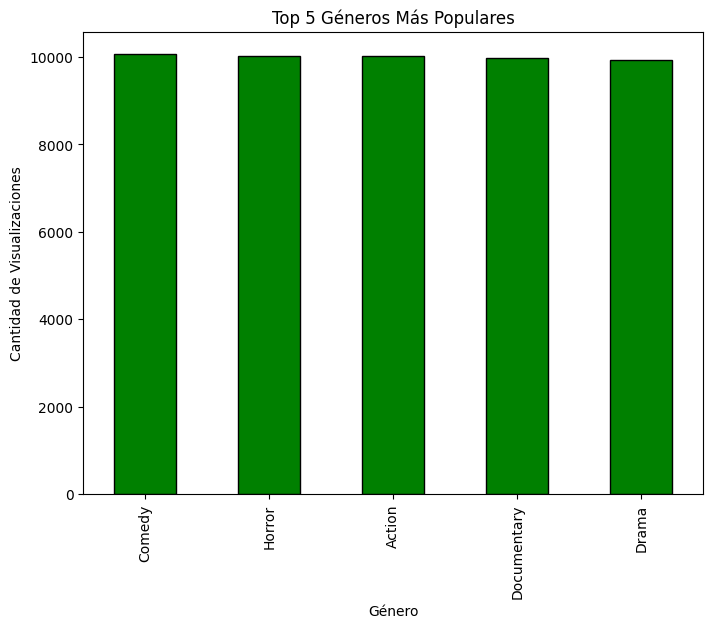

In [7]:
import matplotlib.pyplot as plt

def visualize_data(df):
    # Gráfico 1: Distribución del porcentaje de visualización
    plt.figure(figsize=(10, 6))
    plt.hist(df["view_percentage"], bins=20, color="skyblue", edgecolor="black")
    plt.title("Distribución del Porcentaje de Visualización")
    plt.xlabel("Porcentaje Completado (%)")
    plt.ylabel("Cantidad de Visualizaciones")
    plt.show()

    # Gráfico 2: Horas pico de visualización
    plt.figure(figsize=(10, 6))
    df["view_hour"].value_counts().sort_index().plot(kind="bar", color="orange", edgecolor="black")
    plt.title("Horas Pico de Visualización")
    plt.xlabel("Hora del Día")
    plt.ylabel("Cantidad de Visualizaciones")
    plt.show()

    # Gráfico 3: Top 5 géneros más populares
    top_genres = df["genre"].value_counts().head(5)
    plt.figure(figsize=(8, 6))
    top_genres.plot(kind="bar", color="green", edgecolor="black")
    plt.title("Top 5 Géneros Más Populares")
    plt.xlabel("Género")
    plt.ylabel("Cantidad de Visualizaciones")
    plt.show()

visualize_data(df_raw)


#AHORA VA MEJORADO

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [9]:
# Configuración inicial
np.random.seed(42)
n_users = 10000
n_records = 100000

# Generación de datos
data = {
    "user_id": np.random.randint(1, n_users, n_records),
    "age_group": np.random.choice(["18-24", "25-34", "35-44", "45-54", "55+"], n_records),
    "content_id": np.random.randint(1, 1000, n_records),
    "content_type": np.random.choice(["movie", "series"], n_records),
    "genre": np.random.choice(["Action", "Comedy", "Drama", "Documentary", "Horror"], n_records),
    "duration_total": np.random.randint(20, 180, n_records),  # Duración del contenido
    "duration_viewed": np.random.randint(5, 180, n_records),  # Tiempo visto
    "rating": np.random.choice([1, 2, 3, 4, 5, np.nan], n_records),
    "view_date": [datetime.now() - timedelta(days=np.random.randint(1, 90)) for _ in range(n_records)],
    "device": np.random.choice(["Web", "Mobile", "TV"], n_records),
    "subscription": np.random.choice(["Basic", "Standard", "Premium"], n_records),
    "country": np.random.choice(["USA", "Canada", "Brazil", "UK", "India", "Germany", "Japan"], n_records)
}

df_raw = pd.DataFrame(data)

# Agregar día de la semana y continente
df_raw["day_of_week"] = df_raw["view_date"].dt.day_name()
df_raw["continent"] = df_raw["country"].map({
    "USA": "America", "Canada": "America", "Brazil": "America",
    "UK": "Europe", "Germany": "Europe", "India": "Asia", "Japan": "Asia"
})

print("Muestra de datos generados:")
print(df_raw.head())


Muestra de datos generados:
   user_id age_group  content_id content_type        genre  duration_total  \
0     7271     18-24         392       series        Drama              68   
1      861       55+          14       series  Documentary             102   
2     5391     25-34         350        movie       Action              99   
3     5192     25-34         204        movie       Comedy              52   
4     5735       55+         902       series        Drama             110   

   duration_viewed  rating                  view_date  device subscription  \
0                6     4.0 2024-11-22 22:14:11.051704     Web        Basic   
1               95     4.0 2024-12-15 22:14:11.051762      TV     Standard   
2               98     NaN 2024-11-25 22:14:11.051773  Mobile      Premium   
3               36     1.0 2024-10-18 22:14:11.051782     Web      Premium   
4               93     5.0 2024-11-29 22:14:11.051791      TV        Basic   

   country day_of_week continent  

#Transformaciones Avanzadas

In [10]:
def transform_data(df):
    # Porcentaje de visualización
    df["view_percentage"] = (df["duration_viewed"] / df["duration_total"]) * 100

    # Clasificación de usuarios
    df["user_activity"] = pd.cut(df["view_percentage"],
                                 bins=[0, 20, 80, 100],
                                 labels=["Ocasional", "Moderado", "Hardcore"])

    # Agrupación por edad y género
    genre_age_summary = df.groupby(["age_group", "genre"]).agg(
        total_views=("content_id", "count"),
        avg_rating=("rating", "mean")
    ).reset_index()

    print("Transformaciones completas.")
    return df, genre_age_summary

df_transformed, genre_age_summary = transform_data(df_raw)


Transformaciones completas.


#Visualizaciones Complejas

In [11]:
!pip install deltalake matplotlib pandas requests

<Figure size 1200x600 with 0 Axes>

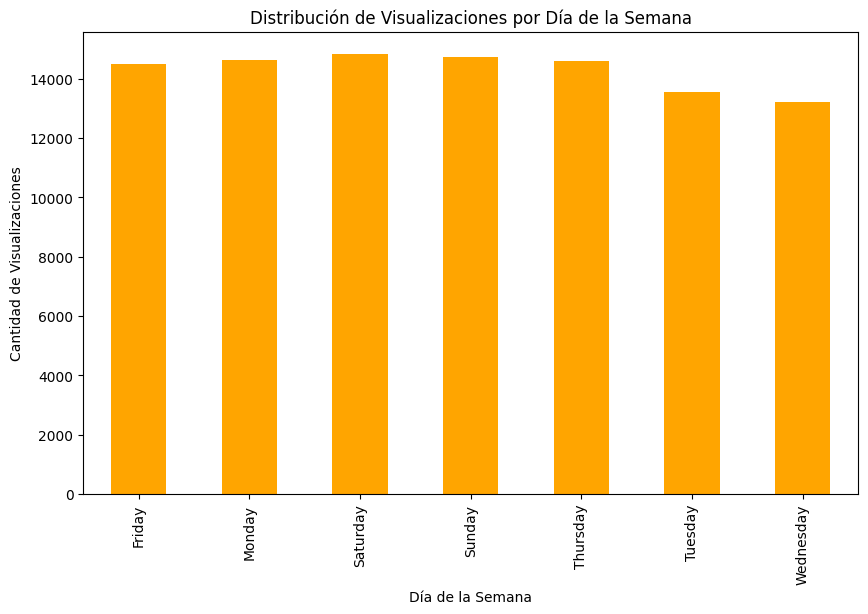

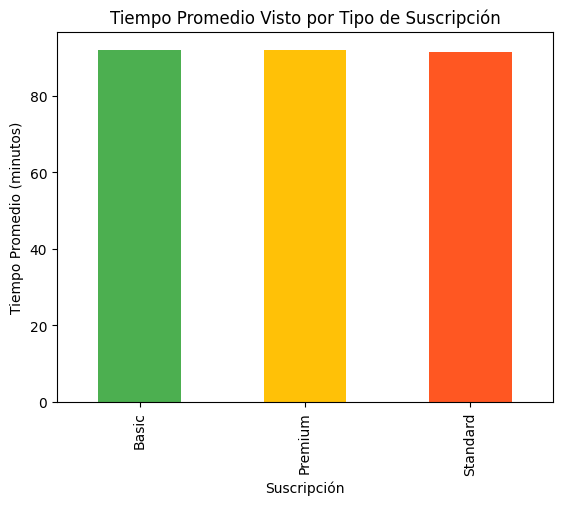

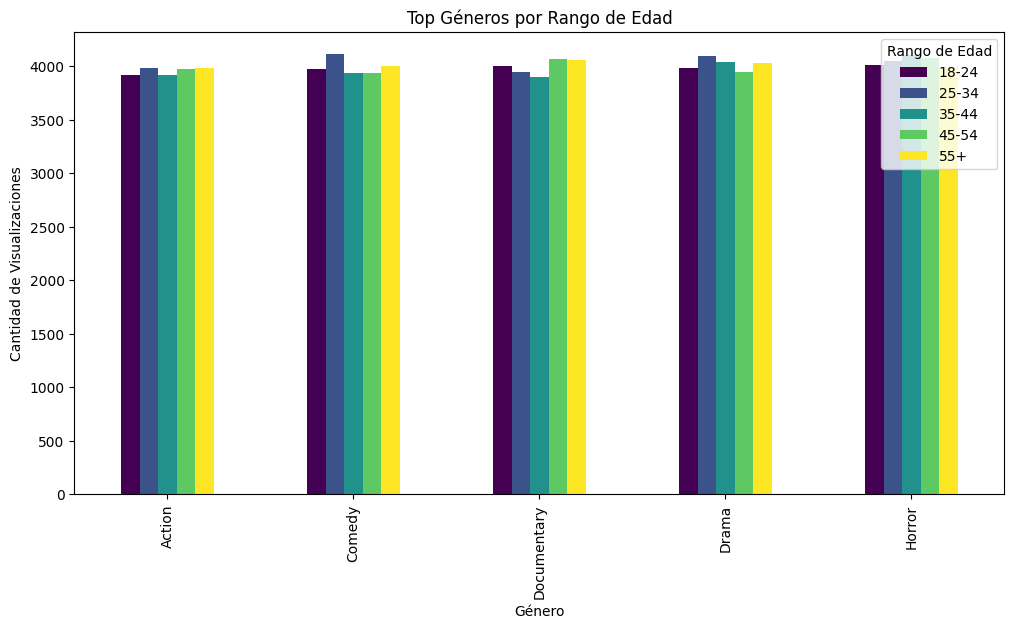

In [14]:
# Gráfico 1: Top géneros por edad
plt.figure(figsize=(12, 6))

# Corregimos la sintaxis de pivot
top_genres = genre_age_summary.pivot(index="genre", columns="age_group", values="total_views")

# Gráfico 2: Consumo por día de la semana
plt.figure(figsize=(10, 6))
df_raw["day_of_week"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Distribución de Visualizaciones por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad de Visualizaciones")
plt.show()

# Gráfico 3: Tiempo promedio visto por suscripción
avg_view_time = df_raw.groupby("subscription")["duration_viewed"].mean()
avg_view_time.plot(kind="bar", color=["#4CAF50", "#FFC107", "#FF5722"])
plt.title("Tiempo Promedio Visto por Tipo de Suscripción")
plt.xlabel("Suscripción")
plt.ylabel("Tiempo Promedio (minutos)")
plt.show()

# Crear el gráfico
top_genres.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Top Géneros por Rango de Edad")
plt.ylabel("Cantidad de Visualizaciones")
plt.xlabel("Género")
plt.legend(title="Rango de Edad")
plt.show()


#Almacenamiento de Datos

In [15]:
!pip install --upgrade deltalake

In [16]:
from deltalake import write_deltalake

# Guardar datos transformados particionados
write_deltalake("/content/netflix_processed", df_transformed, mode="overwrite", partition_cols=["continent", "subscription"])


TypeError: write_deltalake() got an unexpected keyword argument 'partition_cols'

#Al tener problemas con las particiones... divido manualmente el DataFrame en particiones y guardo cada una en la misma ruta

In [17]:
import os
from deltalake import write_deltalake

# Particionar manualmente por 'continent' y 'subscription'
for continent in df_transformed['continent'].unique():
    for subscription in df_transformed['subscription'].unique():
        # Filtrar el DataFrame
        partition_df = df_transformed[(df_transformed['continent'] == continent) &
                                      (df_transformed['subscription'] == subscription)]
        if not partition_df.empty:
            # Generar ruta específica para cada partición
            partition_path = f"/content/netflix_processed/continent={continent}/subscription={subscription}"
            os.makedirs(partition_path, exist_ok=True)

            # Guardar cada partición
            write_deltalake(partition_path, partition_df, mode="overwrite")
            print(f"Datos guardados en {partition_path}")


Datos guardados en /content/netflix_processed/continent=America/subscription=Basic
Datos guardados en /content/netflix_processed/continent=America/subscription=Standard
Datos guardados en /content/netflix_processed/continent=America/subscription=Premium
Datos guardados en /content/netflix_processed/continent=Europe/subscription=Basic
Datos guardados en /content/netflix_processed/continent=Europe/subscription=Standard
Datos guardados en /content/netflix_processed/continent=Europe/subscription=Premium
Datos guardados en /content/netflix_processed/continent=Asia/subscription=Basic
Datos guardados en /content/netflix_processed/continent=Asia/subscription=Standard
Datos guardados en /content/netflix_processed/continent=Asia/subscription=Premium


----------------------------------
----------------------------------
----------------------------------

#Análisis de Frecuencia de Usuarios


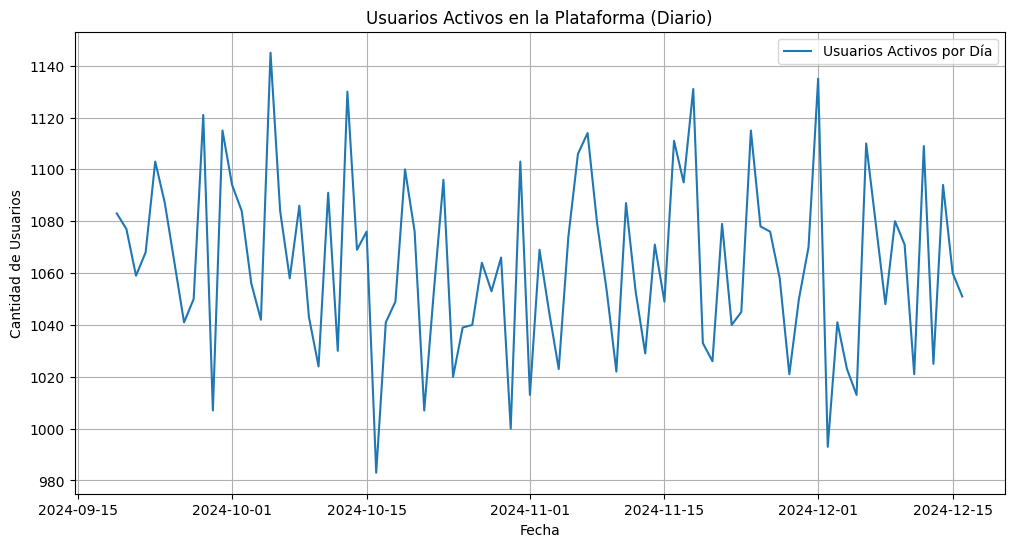

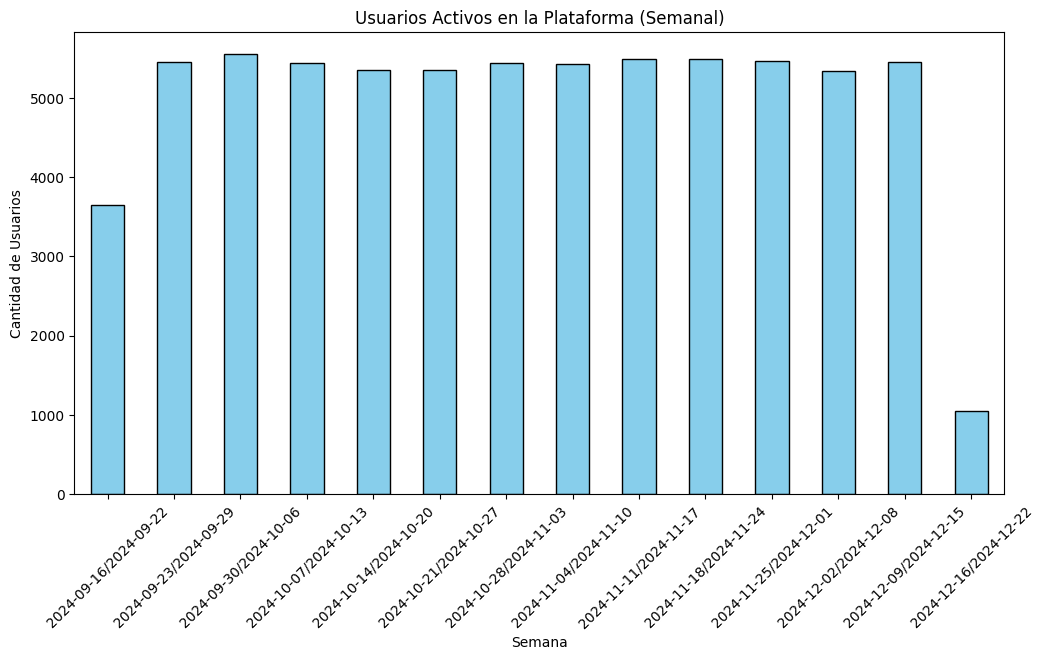

In [18]:
# Usuarios activos por día
active_users_daily = df_transformed.groupby(df_transformed['view_date'].dt.date)['user_id'].nunique()

# Usuarios activos por semana
df_transformed['week'] = df_transformed['view_date'].dt.to_period('W').astype(str)
active_users_weekly = df_transformed.groupby('week')['user_id'].nunique()

# Visualización
plt.figure(figsize=(12, 6))
active_users_daily.plot(kind='line', label="Usuarios Activos por Día")
plt.title("Usuarios Activos en la Plataforma (Diario)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Usuarios")
plt.legend()
plt.grid()
plt.show()

# Gráfico semanal
plt.figure(figsize=(12, 6))
active_users_weekly.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Usuarios Activos en la Plataforma (Semanal)")
plt.xlabel("Semana")
plt.ylabel("Cantidad de Usuarios")
plt.xticks(rotation=45)
plt.show()


#Retención de Usuarios

In [19]:
# Retención: usuarios activos consecutivos
df_retention = df_transformed.sort_values(by=["user_id", "view_date"])
df_retention['next_day'] = df_retention.groupby('user_id')['view_date'].shift(-1)
df_retention['days_between'] = (df_retention['next_day'] - df_retention['view_date']).dt.days

# Usuarios que volvieron al día siguiente
retention_rate = (df_retention['days_between'] == 1).mean()
print(f"Tasa de Retención Diario: {retention_rate:.2%}")


Tasa de Retención Diario: 9.35%


#Análisis Temporal Avanzado

In [21]:
!pip install deltalake matplotlib pandas requests

In [26]:
# Crear la columna 'view_hour' si no existe
if 'view_hour' not in df_transformed.columns:
    df_transformed['view_hour'] = df_transformed['view_date'].dt.hour


In [27]:
print(df_transformed[['view_date', 'view_hour']].head())


                   view_date  view_hour
0 2024-11-22 22:14:11.051704         22
1 2024-12-15 22:14:11.051762         22
2 2024-11-25 22:14:11.051773         22
3 2024-10-18 22:14:11.051782         22
4 2024-11-29 22:14:11.051791         22


<Figure size 1200x600 with 0 Axes>

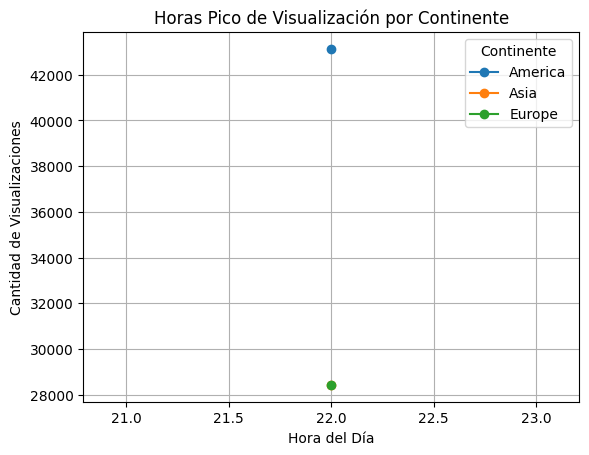

In [28]:
# Horas pico por continente
hourly_usage = df_transformed.groupby(["continent", "view_hour"])['user_id'].count().reset_index()
hourly_usage_pivot = hourly_usage.pivot(index="view_hour", columns="continent", values="user_id")

# Visualización
plt.figure(figsize=(12, 6))
hourly_usage_pivot.plot(kind="line", marker="o")
plt.title("Horas Pico de Visualización por Continente")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Visualizaciones")
plt.legend(title="Continente")
plt.grid()
plt.show()


#Clasificación de Contenidos Populares

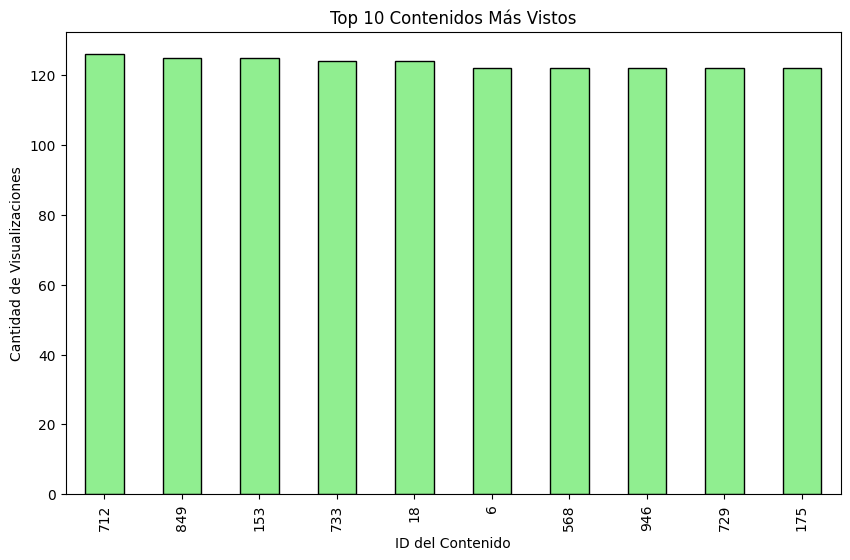

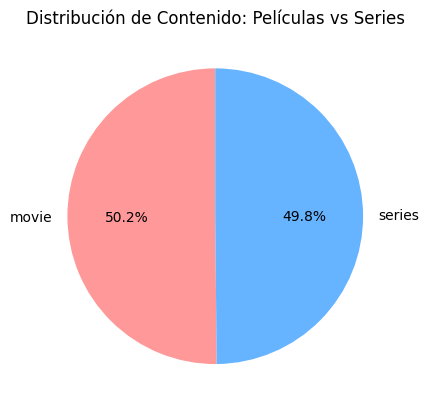

In [23]:
# Top 10 contenidos más vistos
top_content = df_transformed['content_id'].value_counts().head(10)

# Gráfico
plt.figure(figsize=(10, 6))
top_content.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Top 10 Contenidos Más Vistos")
plt.xlabel("ID del Contenido")
plt.ylabel("Cantidad de Visualizaciones")
plt.show()

# Distribución por tipo de contenido
content_distribution = df_transformed['content_type'].value_counts()
content_distribution.plot(kind="pie", autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'], startangle=90)
plt.title("Distribución de Contenido: Películas vs Series")
plt.ylabel("")  # Ocultar etiqueta de Y
plt.show()


#Mapas Interactivos

In [24]:
import plotly.express as px

In [25]:

# Visualización geográfica: cantidad de visualizaciones por país
country_views = df_transformed['country'].value_counts().reset_index()
country_views.columns = ['country', 'views']

fig = px.choropleth(country_views,
                    locations="country",
                    locationmode="country names",
                    color="views",
                    title="Distribución de Visualizaciones por País",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


# --------------------------------------------------------

#---------------------------------------------------------

#Recolecto datos de otras plataformas

In [29]:
# Simular datos de varias plataformas
platforms = ["Netflix", "Amazon Prime", "Disney+", "HBO", "Apple TV+"]

# Actualizamos la generación de datos simulados para incluir 'platform'
data = {
    "user_id": np.random.randint(1, n_users, n_records),
    "platform": np.random.choice(platforms, n_records),
    "content_id": np.random.randint(1, 1000, n_records),
    "content_type": np.random.choice(["movie", "series"], n_records),
    "genre": np.random.choice(["Action", "Comedy", "Drama", "Documentary", "Horror"], n_records),
    "duration_total": np.random.randint(20, 180, n_records),
    "duration_viewed": np.random.randint(5, 180, n_records),
    "rating": np.random.choice([1, 2, 3, 4, 5, np.nan], n_records),
    "view_date": [datetime.now() - timedelta(days=np.random.randint(1, 90)) for _ in range(n_records)],
    "device": np.random.choice(["Web", "Mobile", "TV"], n_records),
    "subscription": np.random.choice(["Basic", "Standard", "Premium"], n_records),
    "country": np.random.choice(["USA", "Canada", "Brazil", "UK", "India", "Germany", "Japan"], n_records)
}

df_raw = pd.DataFrame(data)

# Agregar día de la semana y continente
df_raw["day_of_week"] = df_raw["view_date"].dt.day_name()
df_raw["continent"] = df_raw["country"].map({
    "USA": "America", "Canada": "America", "Brazil": "America",
    "UK": "Europe", "Germany": "Europe", "India": "Asia", "Japan": "Asia"
})

print("Muestra de datos generados:")
print(df_raw.head())


Muestra de datos generados:
   user_id      platform  content_id content_type   genre  duration_total  \
0     1846       Netflix         526       series   Drama             157   
1     4146       Netflix         524        movie  Action              42   
2     5480  Amazon Prime          50        movie  Action             138   
3     1269           HBO         477       series  Action             105   
4     8760       Disney+         333       series  Horror              52   

   duration_viewed  rating                  view_date device subscription  \
0               90     5.0 2024-10-07 22:35:03.488133    Web      Premium   
1               56     4.0 2024-12-09 22:35:03.488173     TV      Premium   
2               42     NaN 2024-10-02 22:35:03.488179     TV        Basic   
3               96     5.0 2024-10-18 22:35:03.488184     TV     Standard   
4               59     4.0 2024-10-21 22:35:03.488188    Web        Basic   

  country day_of_week continent  
0   India   

#Análisis comparativos entre plataformas

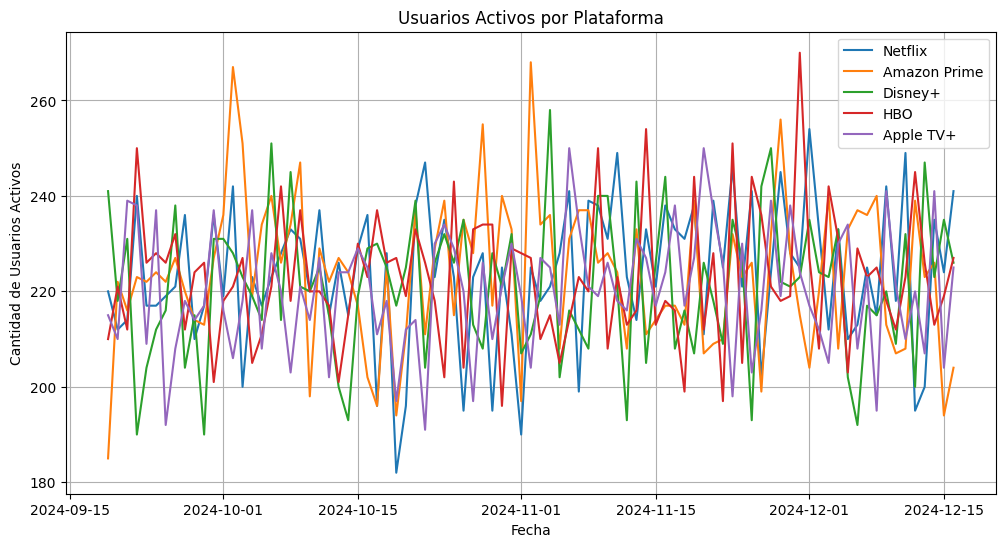

In [30]:
# Usuarios activos por plataforma
active_users_platform = df_raw.groupby(["platform", df_raw['view_date'].dt.date])['user_id'].nunique().reset_index()

# Visualización: Usuarios activos por plataforma y fecha
plt.figure(figsize=(12, 6))
for platform in platforms:
    data = active_users_platform[active_users_platform['platform'] == platform]
    plt.plot(data['view_date'], data['user_id'], label=platform)

plt.title("Usuarios Activos por Plataforma")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Usuarios Activos")
plt.legend()
plt.grid(True)
plt.show()

#horas pico de visualización entre plataformas

In [36]:
# Verifico si la columna 'view_hour' existe en el DataFrame
print(df_raw.columns)

Index(['user_id', 'platform', 'content_id', 'content_type', 'genre',
       'duration_total', 'duration_viewed', 'rating', 'view_date', 'device',
       'subscription', 'country', 'day_of_week', 'continent'],
      dtype='object')


In [37]:
# Crea la columna 'view_hour' basada en 'view_date'
if 'view_hour' not in df_raw.columns:
    df_raw['view_hour'] = df_raw['view_date'].dt.hour


<Figure size 1200x600 with 0 Axes>

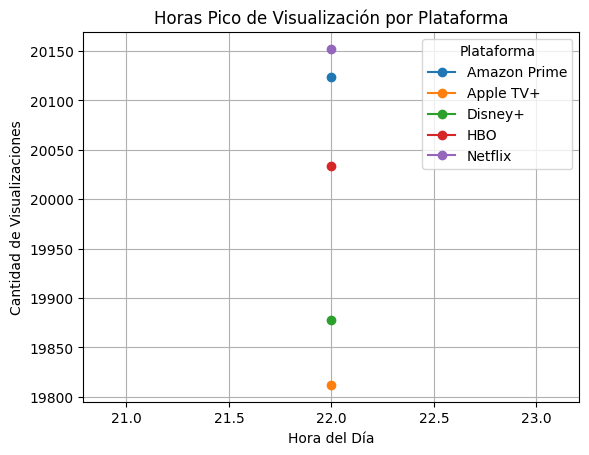

In [38]:
# Horas pico por plataforma
hourly_usage_platform = df_raw.groupby(["platform", "view_hour"])['user_id'].count().reset_index()
hourly_usage_pivot_platform = hourly_usage_platform.pivot(index="view_hour", columns="platform", values="user_id")

# Visualización: Horas pico por plataforma
plt.figure(figsize=(12, 6))
hourly_usage_pivot_platform.plot(kind="line", marker="o")
plt.title("Horas Pico de Visualización por Plataforma")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Visualizaciones")
plt.legend(title="Plataforma")
plt.grid()
plt.show()

#Análisis de géneros más populares por plataforma

<Figure size 1200x600 with 0 Axes>

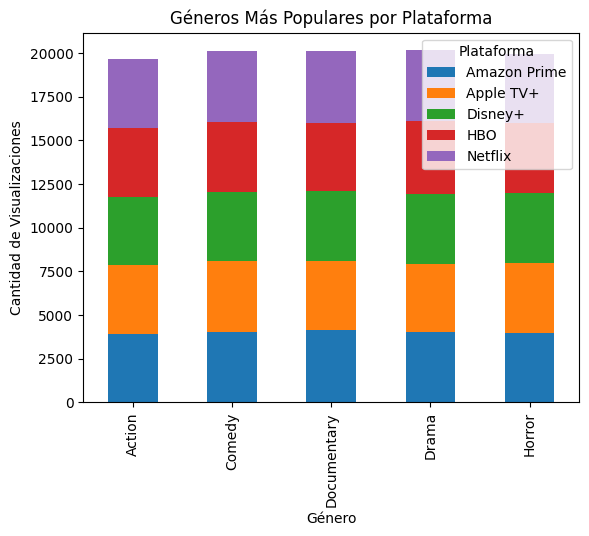

In [32]:
# Análisis de géneros más populares por plataforma
top_genres_platform = df_raw.groupby(["platform", "genre"]).agg(
    total_views=("content_id", "count"),
    avg_rating=("rating", "mean")
).reset_index()

# Visualización: Géneros más populares por plataforma
plt.figure(figsize=(12, 6))
top_genres_platform_pivot = top_genres_platform.pivot(index="genre", columns="platform", values="total_views")
top_genres_platform_pivot.plot(kind="bar", stacked=True)
plt.title("Géneros Más Populares por Plataforma")
plt.xlabel("Género")
plt.ylabel("Cantidad de Visualizaciones")
plt.legend(title="Plataforma")
plt.show()


#Segmentación Avanzada

In [39]:
# Verifico si la columna 'view_percentage' existe en el DataFrame
print(df_raw.columns)


Index(['user_id', 'platform', 'content_id', 'content_type', 'genre',
       'duration_total', 'duration_viewed', 'rating', 'view_date', 'device',
       'subscription', 'country', 'day_of_week', 'continent', 'view_hour'],
      dtype='object')


In [43]:
# Calcular el porcentaje de visualización
df_raw["view_percentage"] = (df_raw["duration_viewed"] / df_raw["duration_total"]) * 100

<ipython-input-44-bd3ae807b8cb>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x600 with 0 Axes>

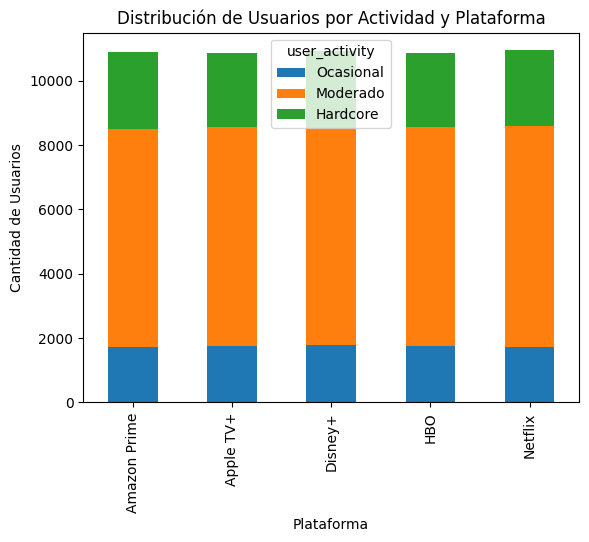

In [44]:
# Segmentación de usuarios por actividad
df_raw["user_activity"] = pd.cut(df_raw["view_percentage"],
                                 bins=[0, 20, 80, 100],
                                 labels=["Ocasional", "Moderado", "Hardcore"])

# Gráfico: Distribución de usuarios por actividad y plataforma
plt.figure(figsize=(12, 6))
activity_distribution = df_raw.groupby(["platform", "user_activity"]).size().unstack().fillna(0)
activity_distribution.plot(kind="bar", stacked=True)
plt.title("Distribución de Usuarios por Actividad y Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de Usuarios")
plt.show()


#*Agrego un análisis temporal: Comportamiento a lo largo de los meses*

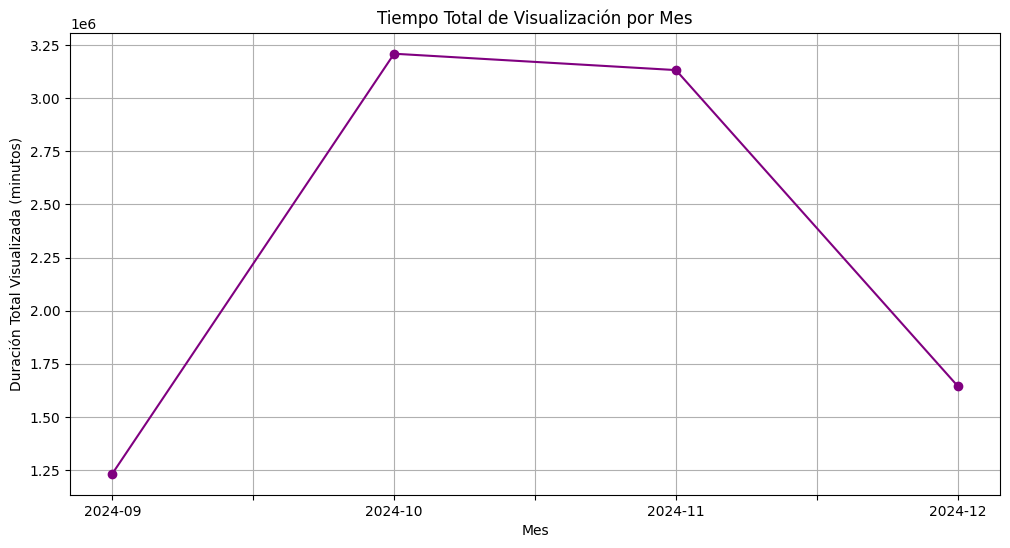

In [45]:
# Total de visualización por mes
df_raw['month'] = df_raw['view_date'].dt.to_period('M').astype(str)
monthly_usage = df_raw.groupby('month')['duration_viewed'].sum()

# Visualización de consumo mensual
plt.figure(figsize=(12, 6))
monthly_usage.plot(kind='line', marker='o', color='purple')
plt.title("Tiempo Total de Visualización por Mes")
plt.xlabel("Mes")
plt.ylabel("Duración Total Visualizada (minutos)")
plt.grid(True)
plt.show()

#*Análisis de tendencias y estacionalidad*

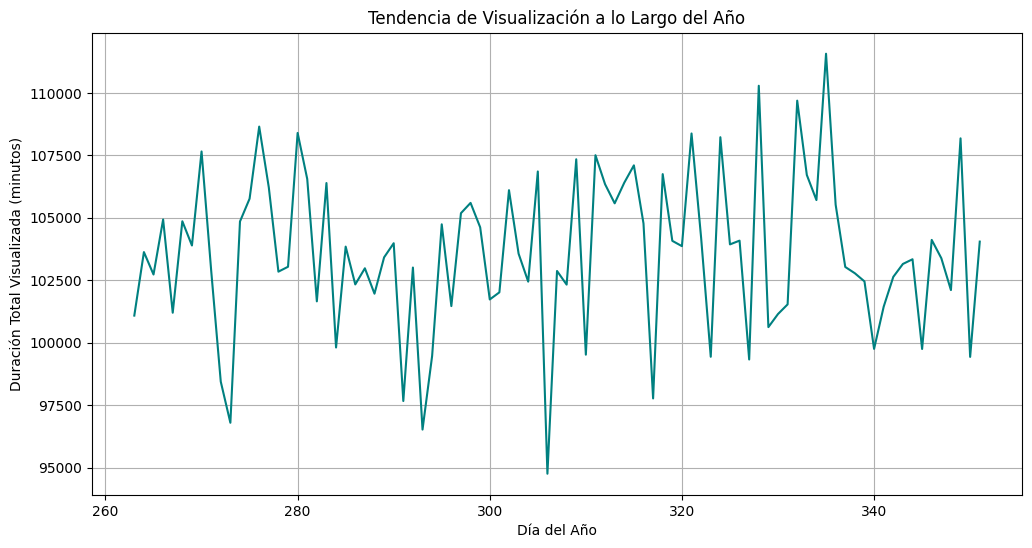

In [46]:
# Tendencia de visualización a lo largo del tiempo
df_raw['day_of_year'] = df_raw['view_date'].dt.dayofyear
trend = df_raw.groupby('day_of_year')['duration_viewed'].sum()

# Visualización: Tendencia de visualización durante el año
plt.figure(figsize=(12, 6))
trend.plot(kind='line', color='teal')
plt.title("Tendencia de Visualización a lo Largo del Año")
plt.xlabel("Día del Año")
plt.ylabel("Duración Total Visualizada (minutos)")
plt.grid(True)
plt.show()

#Análisis de Retención y Churn

**Análisis de Retención:**

In [47]:
# Retención: usuarios activos consecutivos
df_retention = df_raw.sort_values(by=["user_id", "view_date"])
df_retention['next_day'] = df_retention.groupby('user_id')['view_date'].shift(-1)
df_retention['days_between'] = (df_retention['next_day'] - df_retention['view_date']).dt.days

# Usuarios que volvieron al día siguiente
retention_rate = (df_retention['days_between'] == 1).mean()
print(f"Tasa de Retención Diario: {retention_rate:.2%}")

Tasa de Retención Diario: 9.32%


**Desertores:**

In [48]:
# Identificar los usuarios que no han regresado en 30 días
df_raw['last_viewed'] = df_raw.groupby('user_id')['view_date'].transform('max')
df_raw['churn'] = (df_raw['last_viewed'] < (datetime.now() - timedelta(days=30)))

# Calcular la tasa de churn
churn_rate = df_raw['churn'].mean()
print(f"Tasa de Churn (deserción): {churn_rate:.2%}")

Tasa de Churn (deserción): 2.45%


#Análisis de Géneros y Tipos de Contenido

**Visualización por género y plataforma**

<Figure size 1200x600 with 0 Axes>

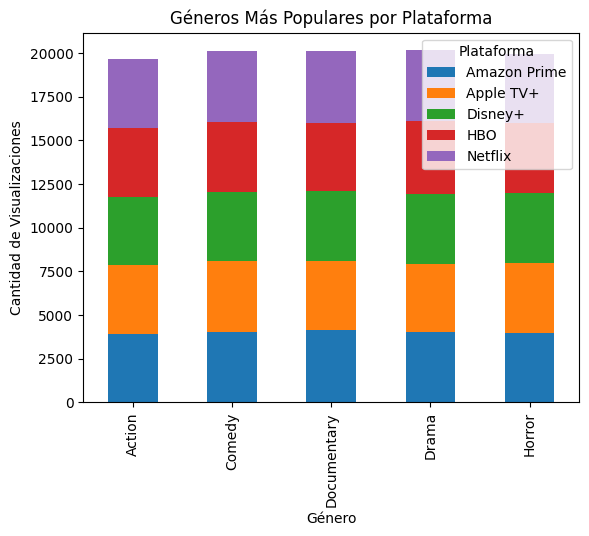

In [49]:
# Géneros más populares por plataforma
top_genres_platform = df_raw.groupby(["platform", "genre"]).agg(
    total_views=("content_id", "count"),
    avg_rating=("rating", "mean")
).reset_index()

# Visualización: Géneros más populares por plataforma
plt.figure(figsize=(12, 6))
top_genres_platform_pivot = top_genres_platform.pivot(index="genre", columns="platform", values="total_views")
top_genres_platform_pivot.plot(kind="bar", stacked=True)
plt.title("Géneros Más Populares por Plataforma")
plt.xlabel("Género")
plt.ylabel("Cantidad de Visualizaciones")
plt.legend(title="Plataforma")
plt.show()

Calificación y tiempo de visualización

------ revisar!!!

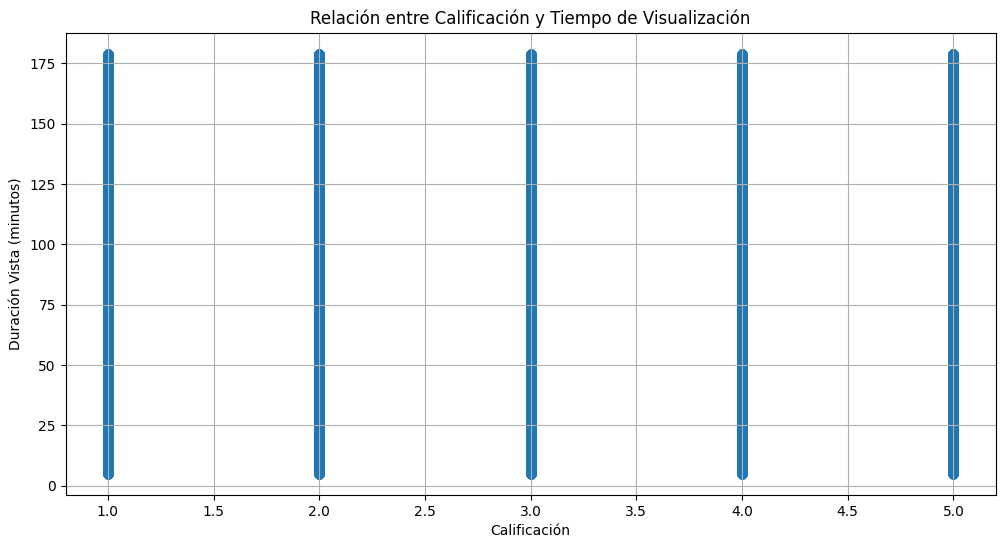

In [50]:
# Correlación entre la calificación y el tiempo de visualización
plt.figure(figsize=(12, 6))
plt.scatter(df_raw['rating'], df_raw['duration_viewed'], alpha=0.5)
plt.title("Relación entre Calificación y Tiempo de Visualización")
plt.xlabel("Calificación")
plt.ylabel("Duración Vista (minutos)")
plt.grid(True)
plt.show()

***Análisis de segmentación***

<Figure size 1200x600 with 0 Axes>

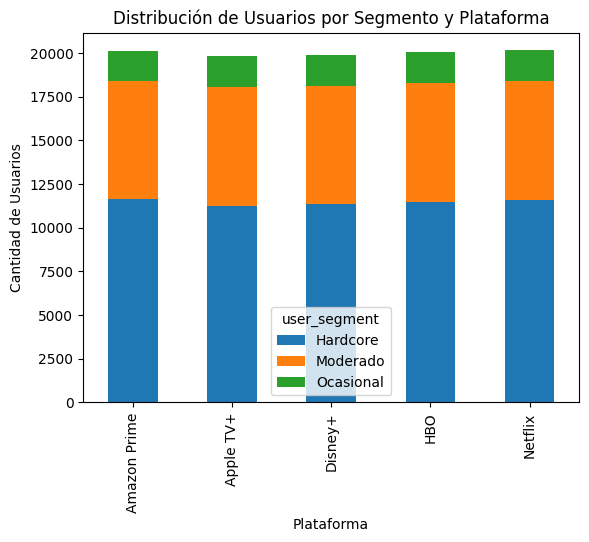

In [51]:
# Clasificación avanzada de usuarios
df_raw["user_segment"] = np.where(df_raw["view_percentage"] > 80, "Hardcore",
                                   np.where(df_raw["view_percentage"] > 20, "Moderado", "Ocasional"))

# Visualización: Segmentación avanzada de usuarios por plataforma
plt.figure(figsize=(12, 6))
user_segment_distribution = df_raw.groupby(["platform", "user_segment"]).size().unstack().fillna(0)
user_segment_distribution.plot(kind="bar", stacked=True)
plt.title("Distribución de Usuarios por Segmento y Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de Usuarios")
plt.show()

#Comparación de plataformas y análisis de competencia

--------- revisar

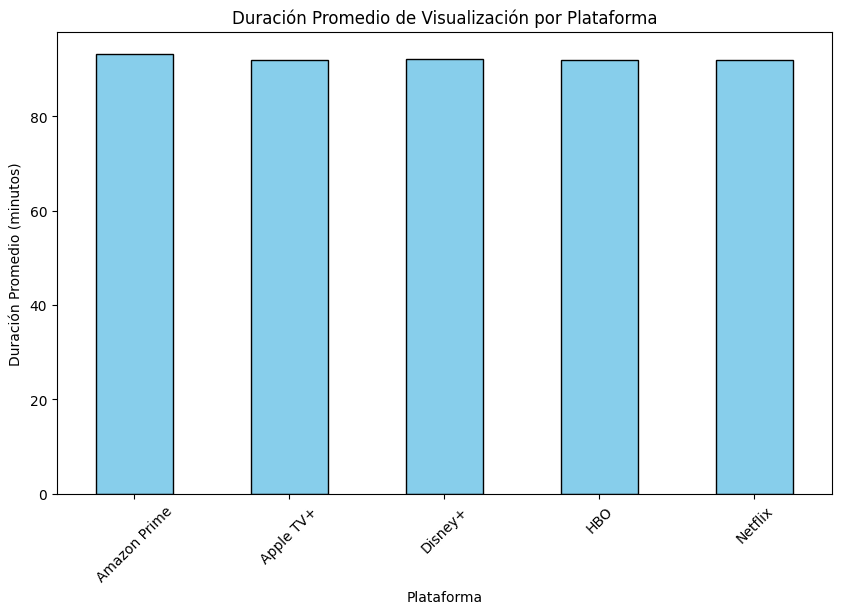

In [52]:
# Comparación de plataformas por duración promedio
platform_avg_duration = df_raw.groupby("platform")["duration_viewed"].mean()

# Visualización
platform_avg_duration.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(10, 6))
plt.title("Duración Promedio de Visualización por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Duración Promedio (minutos)")
plt.xticks(rotation=45)
plt.show()